# HAR using Support Vector Machine (SVM)

Link to Download DataSet : [dataset](http://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions)

# Importing Libraries

In [14]:
from sklearn import svm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Downloading and Preprocessing

In [15]:
# Defining a funtion to load a single file as a numpy array
def load_file(filepath):
	dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

train_X = load_file(r'C:\Users\hp\Downloads\HAPT Data Set\d\Train\X_train.txt')  # Training learning variables
test_X = load_file(r'C:\Users\hp\Downloads\HAPT Data Set\d\Test\X_test.txt')     # Testing leaning variable
train_y= load_file(r'C:\Users\hp\Downloads\HAPT Data Set\d\Train\y_train.txt')  # Training labels variables
test_y = load_file(r'C:\Users\hp\Downloads\HAPT Data Set\d\Test\y_test.txt')     # Testing labels variables

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.fit_transform(test_X)
train_y = train_y.reshape(train_y.shape[0],)
test_y = test_y.reshape(test_y.shape[0],)
print(train_X.shape)
print(test_y.shape)

(7767, 561)
(3162,)


# SVM kernel = Radial basis function

In [29]:
rbf_clf = svm.SVC()
rbf_clf.fit(train_X,train_y)
y_predict = rbf_clf.predict(test_X)
# calculating training and testing accuracy
acc_test = rbf_clf.score(test_X,test_y)
acc_train = rbf_clf.score(train_X,train_y)
print(acc_test)
print(acc_train)

0.941808981657179
0.9858375177031029


# Evaluation

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

labels = ['WALKING','WALKING_UPSTAIRS ','WALKING_DOWNSTAIRS','SITTING ','STANDING','LAYING ','STAND_TO_SIT','SIT_TO_STAND',' SIT_TO_LIE',
                  'LIE_TO_SIT  ','STAND_TO_LIE ','LIE_TO_STAND ']


In [33]:
# function for plotting confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.97      0.95      0.96       496
           2       0.93      0.98      0.95       471
           3       0.94      0.92      0.93       420
           4       0.93      0.93      0.93       508
           5       0.94      0.94      0.94       556
           6       1.00      1.00      1.00       545
           7       0.90      0.78      0.84        23
           8       1.00      0.90      0.95        10
           9       0.72      0.72      0.72        32
          10       0.77      0.68      0.72        25
          11       0.78      0.71      0.74        49
          12       0.69      0.67      0.68        27

    accuracy                           0.94      3162
   macro avg       0.88      0.85      0.86      3162
weighted avg       0.94      0.94      0.94      3162

Confusion matrix, without normalization
[[473   6  17   0   0   0   0   0   0   0   0   0]
 [  9 461   1   0   0   0   0   0   0   0 

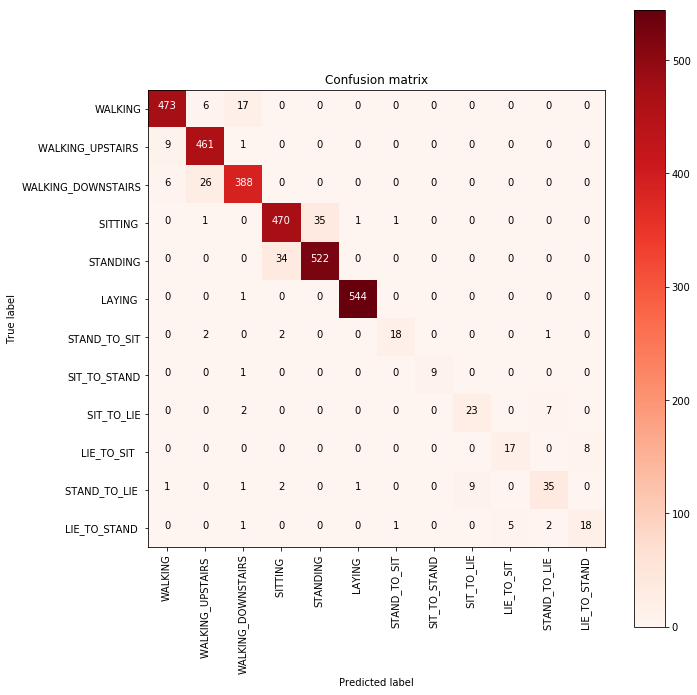

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, y_predict)
np.set_printoptions(precision=2)

print (classification_report(test_y, y_predict))

# Plot non-normalized confusion matrix
plt.figure(figsize = (10, 10))
plot_confusion_matrix(cnf_matrix, labels, normalize= False,  title='Confusion matrix')

In [14]:
from sklearn.metrics import f1_score
f1_score(test_y, y_predict, average='weighted')

0.9414452395945963

# SVM kernel = Linear

In [26]:
# Building Model
linear_clf = svm.SVC(kernel='linear')
linear_clf.fit(train_X,train_y)
y_pred = linear_clf.predict(test_X)

# Calculating Test accuracy
acc_test = linear_clf.score(test_X,test_y)
print(acc)

0.9487666034155597


In [28]:
#calculating train accuracy
acc_train = linear_clf.score(train_X,train_y)
print(acc_train)

0.9970387537015579


* training accuracy is greater than testing accuracy implies model might be overfitting!

# Evaluation

              precision    recall  f1-score   support

           1       0.98      0.98      0.98       496
           2       0.96      0.97      0.97       471
           3       0.97      0.96      0.97       420
           4       0.95      0.91      0.93       508
           5       0.92      0.96      0.94       556
           6       1.00      1.00      1.00       545
           7       0.77      0.74      0.76        23
           8       0.91      1.00      0.95        10
           9       0.60      0.56      0.58        32
          10       0.67      0.72      0.69        25
          11       0.67      0.67      0.67        49
          12       0.67      0.59      0.63        27

    accuracy                           0.95      3162
   macro avg       0.84      0.84      0.84      3162
weighted avg       0.95      0.95      0.95      3162

Confusion matrix, without normalization
[[484   4   8   0   0   0   0   0   0   0   0   0]
 [  8 459   4   0   0   0   0   0   0   0 

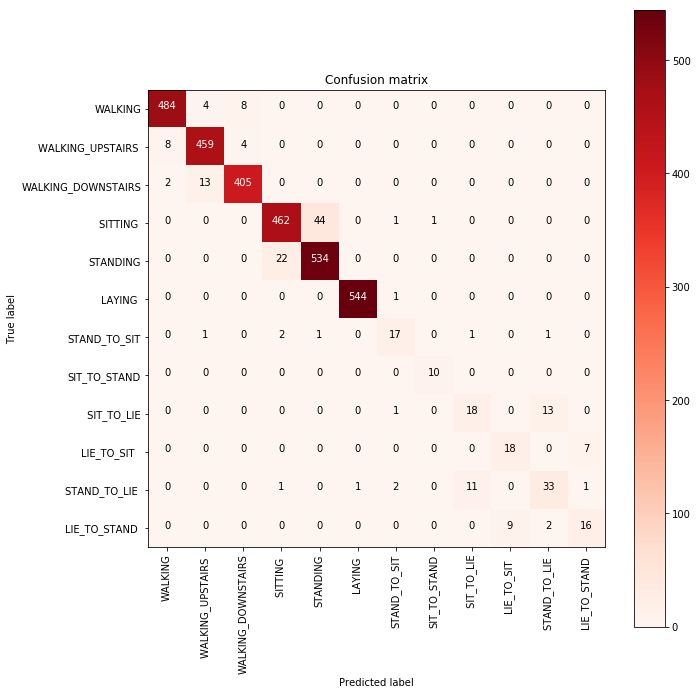

In [16]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, y_pred)
np.set_printoptions(precision=2)

print (classification_report(test_y, y_pred))

# Plot non-normalized confusion matrix
plt.figure(figsize = (10, 10))
plot_confusion_matrix(cnf_matrix, labels, normalize= False,  title='Confusion matrix')

In [17]:
f1_score(test_y, y_pred, average='weighted')

0.9485088668644583

# SVM kernel = Polynomial

In [30]:
linear_clf = svm.SVC(kernel='poly', degree = 2)
linear_clf.fit(train_X,train_y)
y_prd = linear_clf.predict(test_X)
acc_test = linear_clf.score(test_X,test_y)
acc_train = linear_clf.score(train_X,train_y)
print(acc_test)
print(acc_train)

0.92662871600253
0.9813312733359083


with polynomial of degree 3 or higher accuracy decreases!

# Evaluation

              precision    recall  f1-score   support

           1       0.95      0.95      0.95       496
           2       0.91      0.95      0.93       471
           3       0.98      0.86      0.92       420
           4       0.85      0.92      0.88       508
           5       0.93      0.94      0.93       556
           6       0.99      1.00      1.00       545
           7       0.85      0.74      0.79        23
           8       1.00      0.90      0.95        10
           9       0.72      0.72      0.72        32
          10       0.74      0.80      0.77        25
          11       0.75      0.67      0.71        49
          12       0.80      0.59      0.68        27

    accuracy                           0.93      3162
   macro avg       0.87      0.84      0.85      3162
weighted avg       0.93      0.93      0.93      3162

Confusion matrix, without normalization
[[469   1   5  21   0   0   0   0   0   0   0   0]
 [ 13 449   1   6   2   0   0   0   0   0 

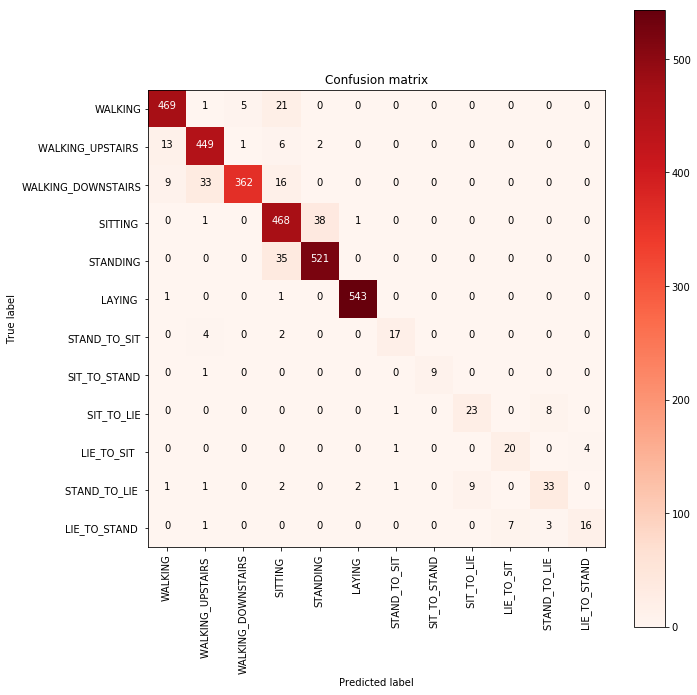

In [24]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, y_prd)
np.set_printoptions(precision=2)

print (classification_report(test_y, y_prd))

# Plot non-normalized confusion matrix
plt.figure(figsize = (10, 10))
plot_confusion_matrix(cnf_matrix, labels, normalize= False,  title='Confusion matrix')

In [25]:
f1_score(test_y, y_prd, average='weighted')

0.9263729430292081

# Conclusion:
* with kernel LINEAR we got the best accuracy of 94.87% !
* further_work: trying cross validation approach to avoid overfitting and to get better accuracy

# HAR with KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
#value of k that is number of nearest neighbor is a hyperparameter, that should be provided by the user, let's start with k=4
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(train_X,train_y)
neigh
yhat = neigh.predict(test_X)
yhat[0:5]

array([5, 5, 4, 5, 5], dtype=int64)

# Accuracy Evaluation

In [17]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(train_y, neigh.predict(train_X)))
print("Test set Accuracy: ", metrics.accuracy_score(test_y, yhat))

Train set Accuracy:  0.9751512810608987
Test set Accuracy:  0.8548387096774194


* significat difference between train and test error, hence the model is not generalizig properly or overfitting.Therefore, need to increase the value of 'k' to get more general model! 

In [21]:
# so we iteratively find the best value of "k"
Ks = 20 # maximum value of "k"
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(train_X,train_y)
    yhat=neigh.predict(test_X)
    mean_acc[n-1] = metrics.accuracy_score(test_y, yhat)

    
    std_acc[n-1]=np.std(yhat==test_y)/np.sqrt(yhat.shape[0])

mean_acc

array([0.83364959, 0.81340923, 0.86179633, 0.85483871, 0.87160025,
       0.86938646, 0.87507906, 0.87223276, 0.87666034, 0.87381404,
       0.87760911, 0.87476281, 0.8769766 , 0.87444655, 0.87539532,
       0.87223276, 0.87602783, 0.87539532, 0.87539532])

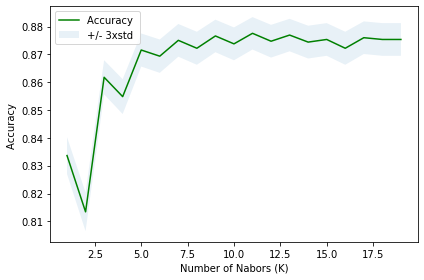

In [22]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [24]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8776091081593927 with k= 11


# HAR with Decision Trees

In [3]:
from sklearn.tree import DecisionTreeClassifier
activity_Tree = DecisionTreeClassifier(criterion="entropy")
activity_Tree # it shows the default parameters
activity_Tree.fit(train_X,train_y)
predTree = activity_Tree.predict(test_X)

In [4]:
print (predTree [0:5])
print (test_y [0:5])

[5 5 5 5 5]
[5 5 5 5 5]


# Evaluating the decision tree

In [5]:
from sklearn import metrics
%matplotlib inline 
print("DecisionTrees's test Accuracy: ", metrics.accuracy_score(test_y, predTree))


DecisionTrees's Accuracy:  0.8358633776091081


# Visualizing the Tree

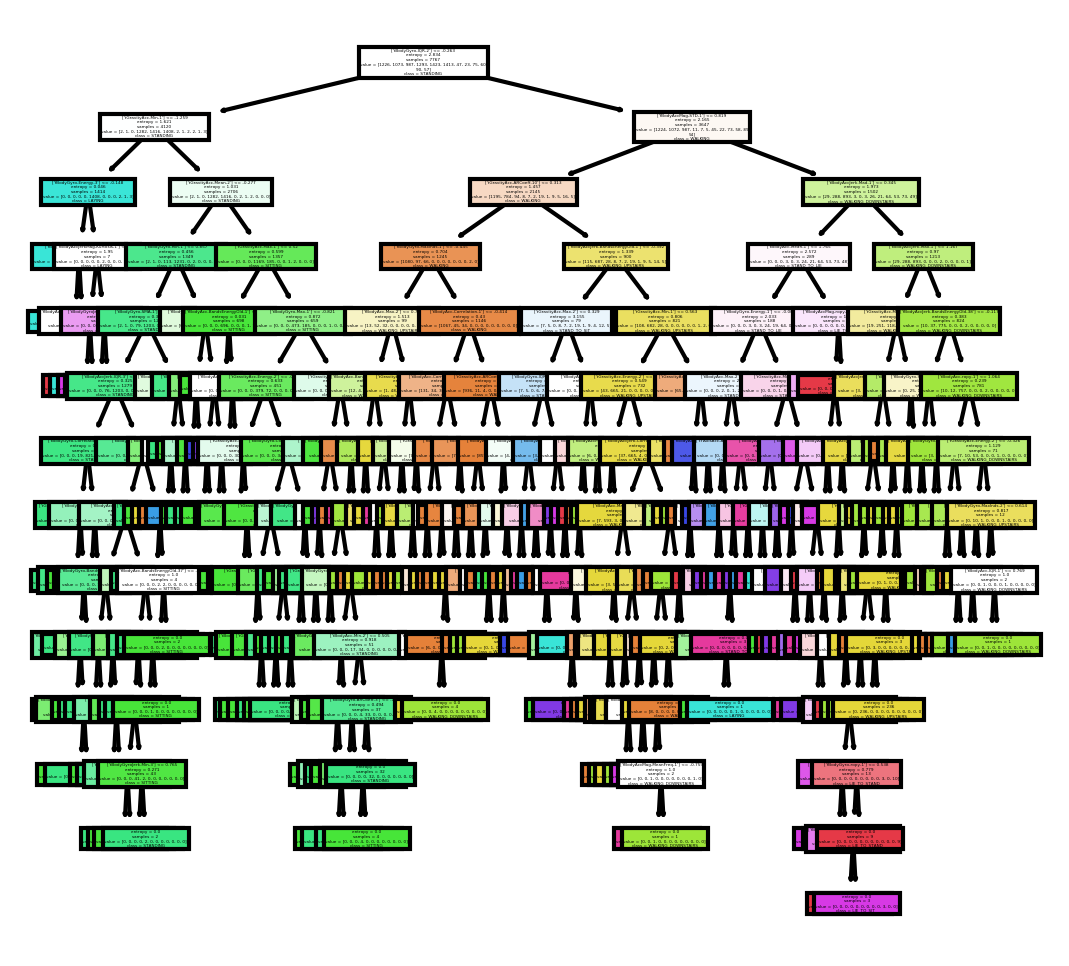

In [51]:
featureNames = load_file(r'C:\Users\hp\Downloads\HAPT Data Set\d\features.txt')
featureNames = featureNames.tolist()
targetNames = labels
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(activity_Tree,
               feature_names = featureNames, 
               class_names=targetNames,
               filled = True);
fig.savefig('imagename.png')

# HAR with Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=1.0, solver='liblinear').fit(train_X,train_y)
LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
yht = LR.predict(test_X)
yht

array([5, 5, 5, ..., 2, 2, 2], dtype=int64)

In [50]:
yht_prob = LR.predict_proba(test_X)
yht_prob

array([[6.38e-07, 1.70e-04, 2.04e-02, ..., 1.24e-03, 2.96e-03, 6.74e-04],
       [1.51e-05, 1.51e-03, 2.63e-05, ..., 2.09e-04, 9.08e-05, 6.53e-04],
       [9.30e-05, 1.46e-04, 1.29e-04, ..., 4.47e-05, 2.73e-04, 8.34e-04],
       ...,
       [8.20e-04, 9.89e-01, 1.68e-03, ..., 1.51e-05, 2.08e-04, 5.32e-03],
       [9.19e-04, 9.93e-01, 1.73e-03, ..., 1.41e-04, 1.75e-04, 1.05e-03],
       [1.78e-02, 9.75e-01, 2.31e-03, ..., 6.88e-05, 1.64e-04, 9.31e-04]])

In [54]:
from sklearn.metrics import jaccard_similarity_score
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(train_y, LR.predict(train_X)))
print("Test set Accuracy: ", metrics.accuracy_score(test_y, yht))
jaccard_similarity_score(test_y, yht)

Train set Accuracy:  0.9940775074031157
Test set Accuracy:  0.9500316255534472


C:\Users\hp\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.9500316255534472

              precision    recall  f1-score   support

           1       0.96      0.97      0.97       496
           2       0.96      0.96      0.96       471
           3       0.99      0.99      0.99       420
           4       0.95      0.88      0.92       508
           5       0.91      0.97      0.94       556
           6       1.00      1.00      1.00       545
           7       0.90      0.78      0.84        23
           8       1.00      1.00      1.00        10
           9       0.64      0.72      0.68        32
          10       0.82      0.72      0.77        25
          11       0.74      0.63      0.68        49
          12       0.72      0.78      0.75        27

    accuracy                           0.95      3162
   macro avg       0.88      0.87      0.87      3162
weighted avg       0.95      0.95      0.95      3162

Confusion matrix, without normalization
[[483   9   4   0   0   0   0   0   0   0   0   0]
 [ 15 452   1   1   0   0   1   0   0   0 

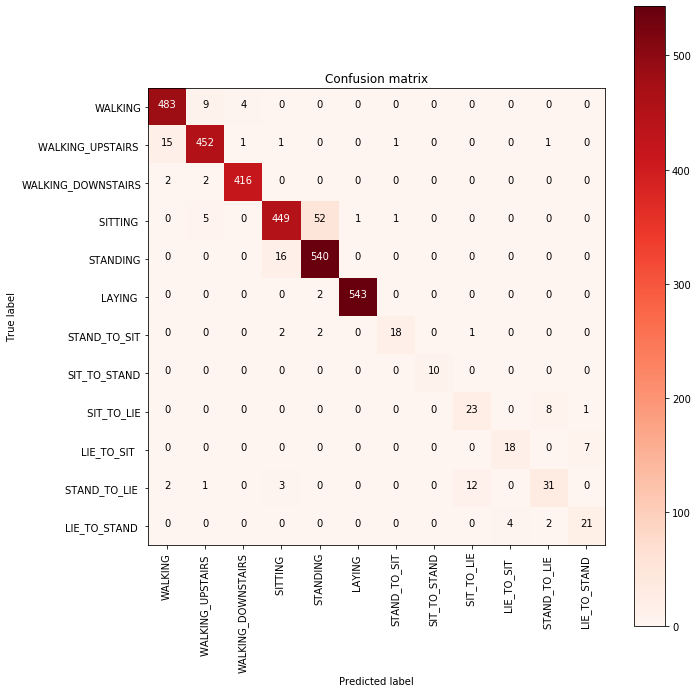

In [55]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, yht)
np.set_printoptions(precision=2)

print (classification_report(test_y, yht))

# Plot non-normalized confusion matrix
plt.figure(figsize = (10, 10))
plot_confusion_matrix(cnf_matrix, labels, normalize= False,  title='Confusion matrix')